# Visualize SWOT Data

### Visualize SWOT LakeSP for a specific pass 

In [6]:
# Import modules
import geopandas as gpd
import pandas as pd
from netCDF4 import Dataset
import glob as glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

In [21]:
# Find files corresponding to pass 
swot_pass = "_162_" # pass over lake powell 
lake_type = "Prior"
lakesp_files = glob.glob("/projects/swot/Data/SWOT_L2_HR_LakeSP_2.0/*" + lake_type + "*" + swot_pass +  "*.zip")

In [25]:
# Open the first file
zipfile = "zip://" + lakesp_files[0]
lakesp_gdf = gpd.read_file(zipfile)

# Filter to nominal observations 
lakesp_gdf = lakesp_gdf[lakesp_gdf['quality_f'] == 0]

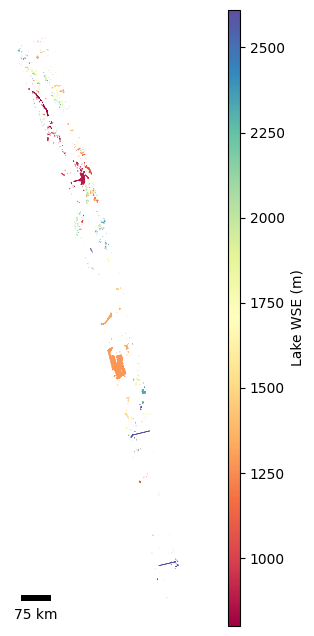

In [44]:
# Calculate the the 5 and 95 percentile wse 
q05 = lakesp_gdf['wse'].quantile(0.05)
q95 = lakesp_gdf['wse'].quantile(0.95)

# Plot a map of the lake WSE (m) 
fig, ax = plt.subplots(1, 1, figsize = (4, 8 ))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lakesp_gdf.plot(
    column="wse",
    edgecolor='face',
    linewidth=0.5,
    ax=ax,
    legend=True,
    cax=cax,
    cmap = 'Spectral',
    vmin = q05,
    vmax = q95,
    legend_kwds={"label": "Lake WSE (m)"},
)

ax.set_title("")
ax.set_axis_off()
ax.add_artist(ScaleBar(50000, location="lower left"))
plt.show()
# Save the plot 
#plt.savefig("/projects/swot/lake_plot.png", bbox_inches='tight', dpi=1000)


### Visualize SWOT RiverSP for a specific pass 

In [5]:
# Find files corresponding to pass 
swot_pass = "_162_" # pass over lake powell 
river_type = "Reach"
riversp_files = glob.glob("/projects/swot/Data/SWOT_L2_HR_RiverSP_2.0/*" + river_type + "*" + swot_pass +  "*.zip")

In [7]:
# Open the first file
zipfile = "zip://" + riversp_files[0]
riversp_gdf = gpd.read_file(zipfile)

# Filter to nominal observations 
riversp_gdf = riversp_gdf[riversp_gdf['reach_q'] <= 1] # keep good and suspect observations

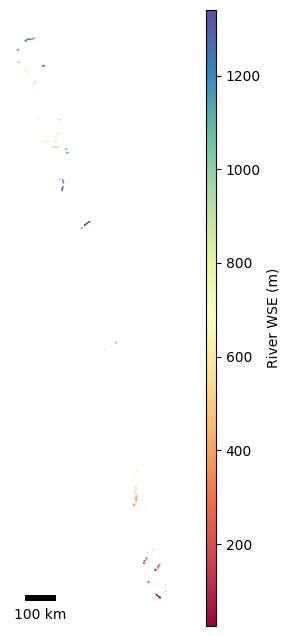

In [14]:
# Calculate the the 5 and 95 percentile wse 
q05 = riversp_gdf['wse'].quantile(0.05)
q95 = riversp_gdf['wse'].quantile(0.95)

# Plot a map of the lake WSE (m) 
fig, ax = plt.subplots(1, 1, figsize = (4, 8 ))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

riversp_gdf.plot(
    column="wse",
    linewidth=1,
    ax=ax,
    legend=True,
    cax=cax,
    cmap = 'Spectral',
    vmin = q05,
    vmax = q95,
    legend_kwds={"label": "River WSE (m)"},
)

ax.set_title("")
ax.set_axis_off()
ax.add_artist(ScaleBar(50000, location="lower left"))
plt.show()
# Save the plot 
#plt.savefig("/projects/swot/lake_plot.png", bbox_inches='tight', dpi=1000)

### Visualize SWOT Pixel Cloud for a specific scene

In [2]:
# Find files corresponding to scene 
swot_pass = "_162_089R_" # pass over lake powell 
pixc_files = glob.glob("/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/*" + swot_pass +  "*.nc")

['/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_005_162_089R_20231018T105145_20231018T105156_PGC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_010_162_089R_20240130T183712_20240130T183723_PIC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_001_162_089R_20230726T235126_20230726T235137_PGC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_011_162_089R_20240220T152217_20240220T152228_PIC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_017_162_089R_20240624T195243_20240624T195254_PIC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_008_162_089R_20231220T010700_20231220T010711_PGC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_014_162_089R_20240423T053730_20240423T053741_PIC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_007_162_089R_20231129T042156_20231129T042207_PGC0_01.nc',
 '/projects/swot/Data/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_015_162_089R_2

In [9]:
# Open the first file
pixc_dataset = Dataset(pixc_files[0])
dt = getattr(pixc_dataset, "time_coverage_start")
longitude = pixc_dataset.groups['pixel_cloud']['longitude'][:]
latitude = pixc_dataset.groups['pixel_cloud']['latitude'][:]
classification = pixc_dataset.groups['pixel_cloud']['classification'][:]

height = pixc_dataset.groups['pixel_cloud']['height'][:]
geoid = pixc_dataset.groups['pixel_cloud']['geoid'][:]
solidearthtide = pixc_dataset.groups['pixel_cloud']['solid_earth_tide'][:]
loadtide = pixc_dataset.groups['pixel_cloud']['load_tide_fes'][:]
pole_tide = pixc_dataset.groups['pixel_cloud']['pole_tide'][:]
wse = height - geoid - solidearthtide - loadtide - pole_tide

df = pd.DataFrame({
    "longitude": longitude,
    "latitude": latitude,
    "wse":wse,
    "classification": classification
})

# Filter pixels that are not open water or dark water 
# 1 = land, 2 = land_near_water, 3 = water_near_land 
# 4 = open_water, 5 = dark_water, 6 = low_coh_water_near_land, 7 = open_low_coh_water
df = df[((df['classification'] == 4) | (df['classification'] == 5) | (df['classification'] == 3))]

# Convert to a geopandas df 
pixc_gdf = gpd.GeoDataFrame( df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")



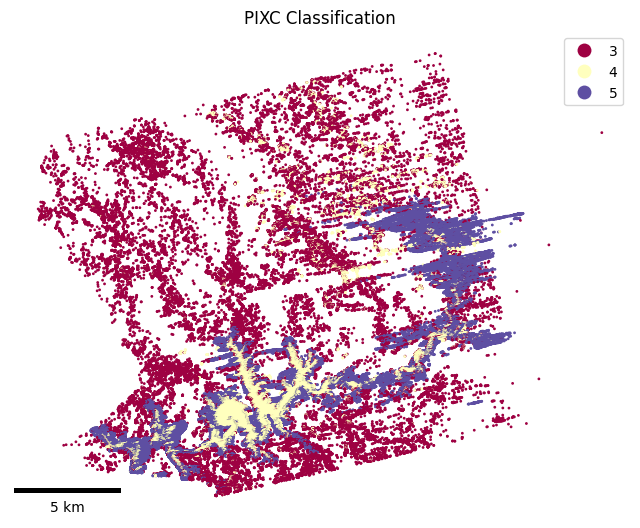

In [14]:
# Plot the PIXC classification 
fig, ax = plt.subplots(1, 1, figsize = (8, 8 ))

pixc_gdf.plot(
    column="classification",
    markersize=3,
    categorical=True,
    ax=ax,
    legend=True,
    cax=cax,
    cmap = 'Spectral',
)

ax.set_title("PIXC Classification")
ax.set_axis_off()
ax.add_artist(ScaleBar(25000, location="lower left"))
plt.show()


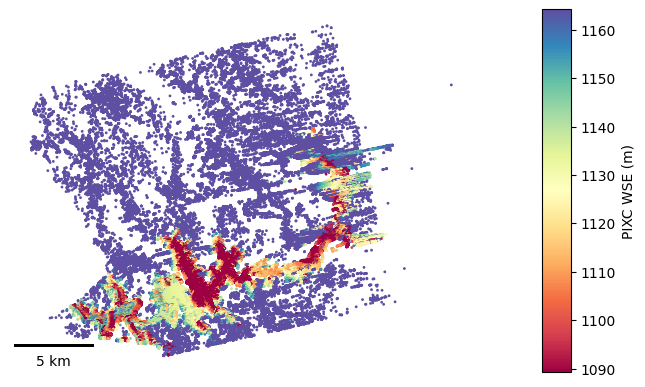

In [28]:
# Plot the PIXC WSE (m)
q10 = pixc_gdf['wse'].quantile(0.1)
q90 = pixc_gdf['wse'].quantile(0.9)
fig, ax = plt.subplots(1, 1, figsize = (8, 8 ))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

pixc_gdf.plot(
    column="wse",
    markersize=1,
    ax=ax,
    legend=True,
    cax=cax,
    cmap = 'Spectral',
    vmin = q10,
    vmax = q90,
    legend_kwds={"label": "PIXC WSE (m)"},
)

ax.set_title("")
ax.set_axis_off()
ax.add_artist(ScaleBar(25000, location="lower left"))
plt.show()